In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

We import pandas for data manipulation, seaborn and matplotlib.pyplot for plotting.

In [3]:
df = pd.read_csv("/content/data.csv")

print("Total samples:", df.shape)


Total samples: (569, 33)


Loads the CSV file and prints the number of rows and columns.

In [4]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Helps verify if there are any missing values that need to be handled.

In [5]:
df = df.drop(columns=["id"])

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

We remove the unnecessary ID column and convert diagnosis to numerical format for analysis.

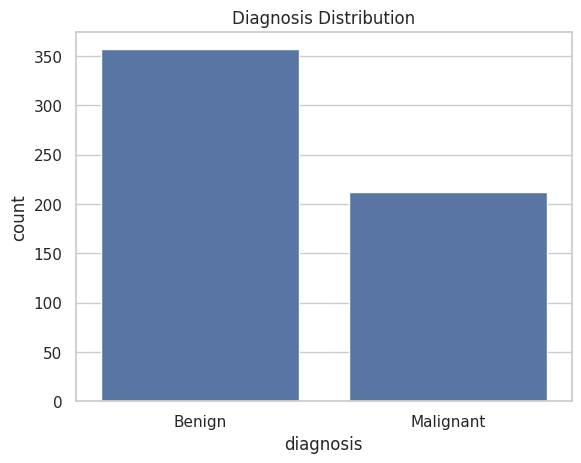

In [6]:
# Visualize class distribution (Benign vs Malignant)
sns.countplot(x='diagnosis', data=df)
plt.xticks([0, 1], ['Benign', 'Malignant'], rotation=0)
plt.title('Diagnosis Distribution')
plt.show()

A bar chart that shows how many samples are benign vs malignant.

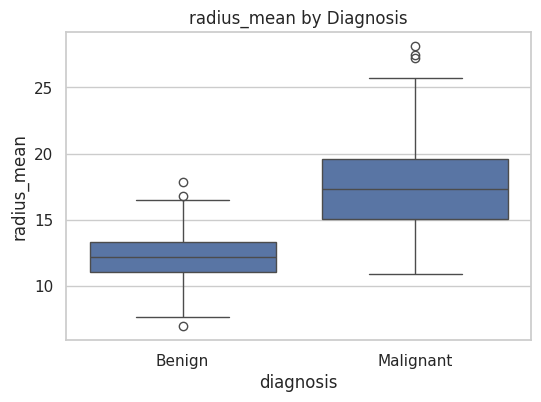

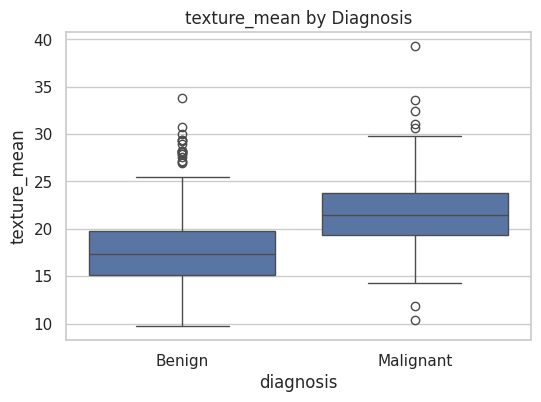

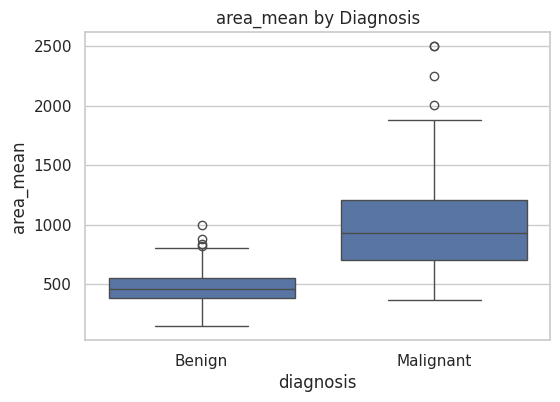

In [7]:
# Visualize distribution of key features across diagnosis
features = ['radius_mean', 'texture_mean', 'area_mean']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.xticks([0, 1], ['Benign', 'Malignant'], rotation=0)
    plt.title(f'{feature} by Diagnosis')
    plt.show()

Boxplots show how these three features differ between benign and malignant tumors.

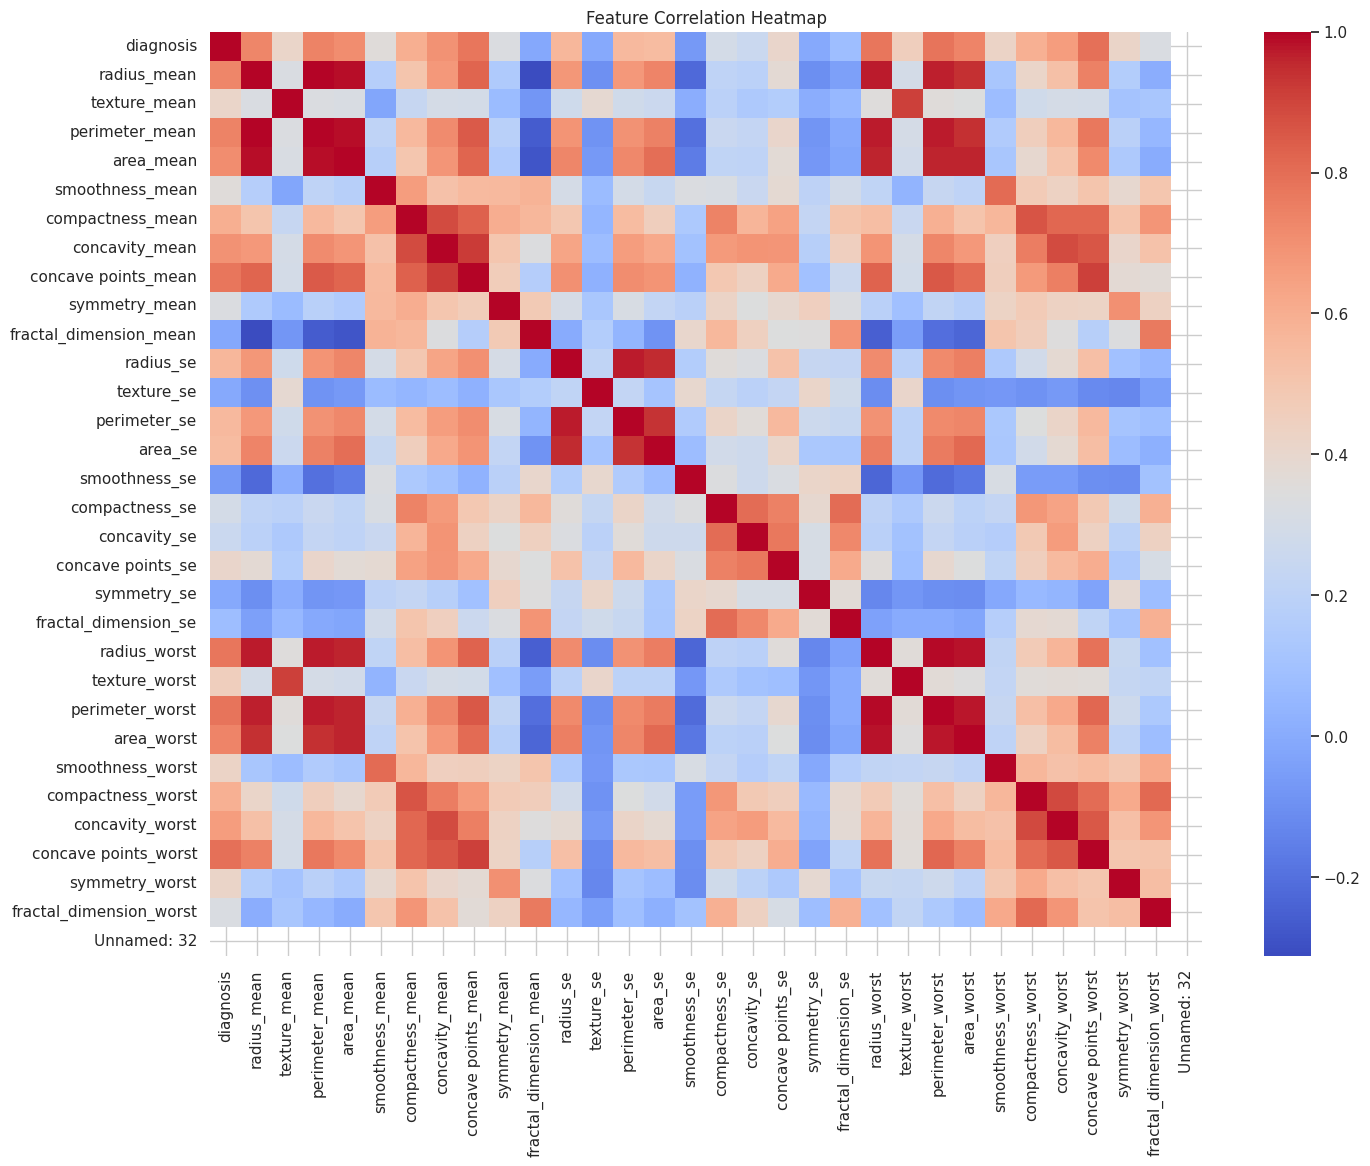

In [8]:
# Correlation heatmap to see relationships between all features
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


Shows which features are strongly correlated — useful for feature selection.

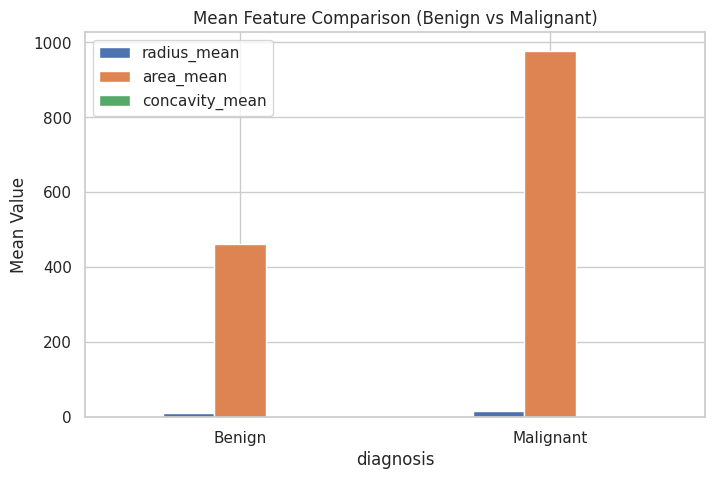

In [9]:
# Compare average feature values by diagnosis
grouped = df.groupby('diagnosis').mean()[['radius_mean', 'area_mean', 'concavity_mean']]
grouped.plot(kind='bar', figsize=(8, 5))
plt.title('Mean Feature Comparison (Benign vs Malignant)')
plt.ylabel('Mean Value')
plt.xticks([0, 1], ['Benign', 'Malignant'], rotation=0)
plt.show()

Compares the average values of three important features for each class.



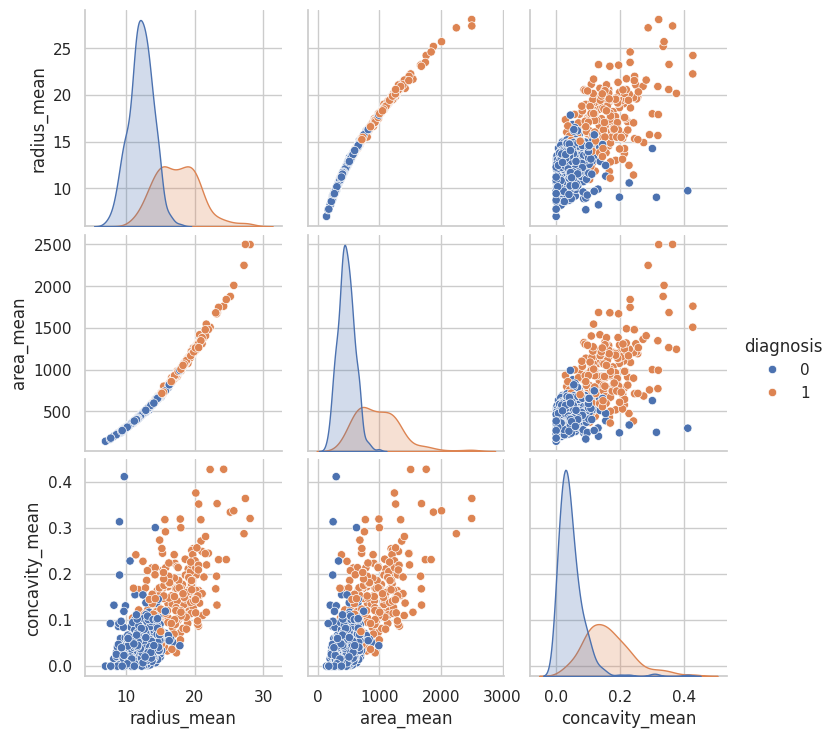

In [10]:
# Pairplot to visualize relationships and clustering
sns.pairplot(df[['radius_mean', 'area_mean', 'concavity_mean', 'diagnosis']], hue='diagnosis')
plt.show()

Scatterplot matrix that shows how features interact and cluster for benign vs malignant tumors.

### 📊 Correlation Matrix for Tableau Heatmap

In [ ]:
features = df.drop(columns=['diagnosis'])

correlation_matrix = features.corr()

correlation_long = correlation_matrix.stack().reset_index()
correlation_long.columns = ['Feature_1', 'Feature_2', 'Correlation']

correlation_long.to_csv('correlation_data.csv', index=False)

This step transforms the correlation matrix into a long-form table with three columns: Feature_1, Feature_2, and Correlation. This format is ideal for visualizing a heatmap in Tableau. The resulting CSV (correlation_data.csv) can be uploaded and used to create a correlation heatmap with color representing the correlation strength between feature pairs.